In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

C:\Users\dany\.conda\envs\tfm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\dany\.conda\envs\tfm\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dany\.conda\envs\tfm\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dany\.conda\envs\tfm\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#image = Image.open(requests.get(url, stream=True).raw)

In [3]:
image = Image.open('IMG_8600 2.jpg')

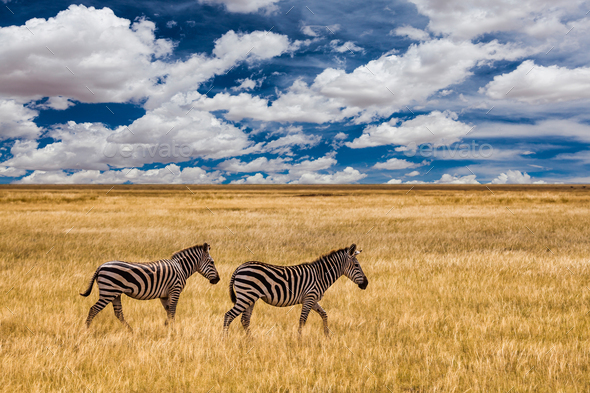

In [4]:
image

In [5]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

C:\Users\dany\.conda\envs\tfm\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\dany\.conda\envs\tfm\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
inputs = processor(images=image, return_tensors="pt")

In [7]:
inputs

{'pixel_values': tensor([[[[-1.9124, -1.8268, -1.6727,  ...,  0.8104,  0.7762,  0.7591],
          [-1.9638, -1.8953, -1.7754,  ...,  0.7762,  0.7419,  0.7248],
          [-2.0494, -2.0323, -1.9980,  ...,  0.7248,  0.6906,  0.6734],
          ...,
          [ 1.5125,  1.4783,  1.4098,  ...,  1.3927,  1.0844,  0.9303],
          [ 1.5468,  1.5297,  1.4612,  ...,  1.3242,  1.0673,  0.9474],
          [ 1.5639,  1.5468,  1.4954,  ...,  1.2899,  1.0673,  0.9474]],

         [[-1.0028, -0.9853, -0.9328,  ...,  1.0280,  1.0105,  1.0105],
          [-1.0378, -1.0203, -0.9853,  ...,  1.0105,  0.9930,  0.9930],
          [-1.1253, -1.1078, -1.0728,  ...,  0.9755,  0.9580,  0.9580],
          ...,
          [ 0.7479,  0.7129,  0.6078,  ...,  0.7654,  0.4678,  0.3277],
          [ 0.7654,  0.7304,  0.6429,  ...,  0.6779,  0.4503,  0.3452],
          [ 0.7654,  0.7304,  0.6604,  ...,  0.6429,  0.4503,  0.3452]],

         [[-0.0441,  0.0082,  0.1128,  ...,  1.5071,  1.5071,  1.5071],
          [-0

In [8]:
target_sizes = torch.tensor([image.size[::-1]])

In [9]:
target_sizes

tensor([[393, 590]])

In [10]:
outputs = model(**inputs)

In [11]:
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [12]:
results

{'scores': tensor([0.9991, 0.9992], grad_fn=<IndexBackward0>),
 'labels': tensor([24, 24]),
 'boxes': tensor([[ 78.8060, 243.1202, 220.1975, 330.3875],
         [222.0529, 244.5496, 368.8340, 337.3303]], grad_fn=<IndexBackward0>)}

In [13]:
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected zebra with confidence 0.999 at location [78.81, 243.12, 220.2, 330.39]
Detected zebra with confidence 0.999 at location [222.05, 244.55, 368.83, 337.33]


In [14]:
scores = []
labels = []
boxes = []
for i in results:
    if i == 'scores':
        scores.append(results[i].tolist())
    elif i == 'labels':
        labels.append(results[i].tolist())
    else:
        boxes.append(list(results[i].tolist()))
#print(boxes[0])
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
img = read_image('IMG_8600 2.jpg')

# bounding box in (xmin, ymin, xmax, ymax) format
#bbox1 = [30, 45, 330, 450]
#bbox2 = [320, 150, 690, 460]
bbox = boxes[0]
labels = labels[0]
labels = [model.config.id2label[lab] for lab in labels]
bbox = torch.tensor(bbox, dtype=torch.int)
print(bbox)
print(bbox.size())
#print(labels)

import distinctipy
colors = distinctipy.get_colors(len(set(labels)))
int_colors = [tuple(int(c*255) for c in color) for color in colors]

# draw bounding boxes with fill color
img=draw_bounding_boxes(img, bbox,width=3,labels= labels,colors=[int_colors[i] for i in [list(set(labels)).index(label) for label in labels]],fill =False,font_size=20)
img = torchvision.transforms.ToPILImage()(img)
img.show()
        

tensor([[ 78, 243, 220, 330],
        [222, 244, 368, 337]], dtype=torch.int32)
torch.Size([2, 4])


C:\Users\dany\AppData\Local\Temp\ipykernel_28336\3199666074.py:24: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  bbox = torch.tensor(bbox, dtype=torch.int)
C:\Users\dany\.conda\envs\tfm\lib\site-packages\torchvision\utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")
